In this exercise we will play with a classical Boston Property Dataset.  It describes the prices of 
properties in Boston in '70. The task is to understand how they depend on multiple factors. Please 
consider the following URL for more details https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

    
Note the list of considered variables. Varianble number 14: MEDV - Median value of owner-occupied homes 
in $1000's is the descriptive variable we want to understand. 
In order to avoid extensve file processing, two files boston and boston_prices have been prepared for you. 
In the code below we read them and create the Ball Mapper plot.

This notebook was prepared by Simon Rudkin, Paweł Dłotko and Davide Gurnari. 

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
points_df = pd.read_csv('data/boston', sep='\t', 
                     header=None, names=['V'+str(i) for i in range(1,14)])
print(points_df.shape)
points_df.head()

(506, 13)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
values_df = pd.read_csv('data/boston_prices', header=None, names=['price'])
print(values_df.shape)
values_df.head()

(506, 1)


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Create Ball Mapper

In [4]:
# uncomment this if you are on colab
# !pip install -q pyballmapper

In [5]:
from pyballmapper import BallMapper

In [6]:
bm = BallMapper(X = points_df.to_numpy(), # the pointcloud, as a numpy array
                eps = 100)             # the radius of the balls

In [7]:
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

my_rainbow_palette = cm.get_cmap('viridis')

In [8]:
values_df

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
bm.Graph.nodes[1]

{'landmark': 18,
 'points covered': array([ 16,  18,  25,  27,  30,  32,  33,  34,  36,  70,  71,  73,  95,
        208, 214, 227, 228, 229, 230, 231, 233, 234, 235, 238, 242, 243,
        244, 248, 251, 310, 332, 346]),
 'size': 32}

<Axes: >

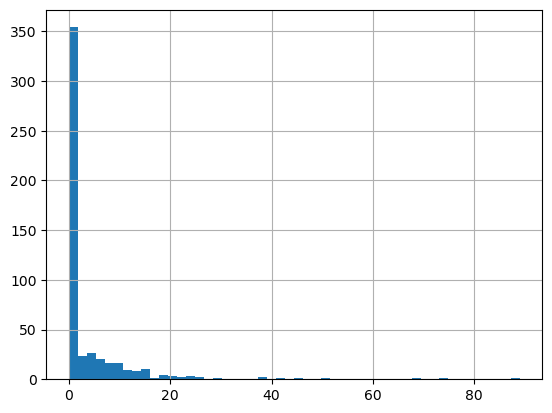

In [14]:
points_df.V1.hist(bins=50)

{}


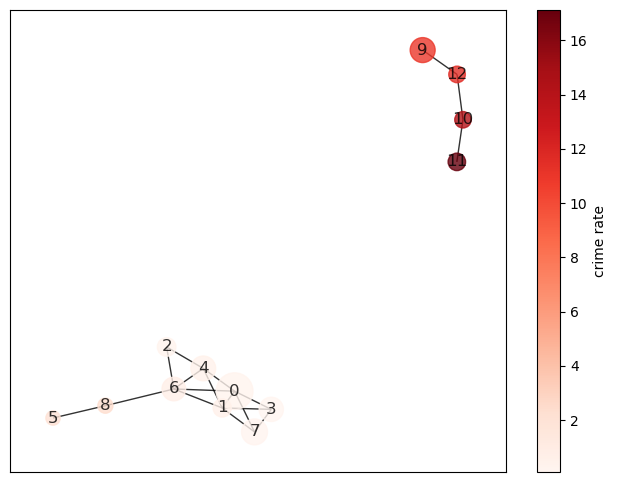

In [15]:
# bm.add_coloring(values_df)
# we can color the graph by any column in coloring_df

plt.figure(figsize= (8,6))
my_variable = 'V1'
bm.add_coloring(coloring_df=points_df)
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(coloring_variable=my_variable, color_palette=cm.get_cmap('Reds'), colorbar=True, colorbar_label='crime rate')
# plt.title('BM graph colored by {}'.format(my_variable))
plt.savefig('boston_BM_crime.pdf')
plt.show()

## More coloring

Since our dataset is relativelly low dimensional, we may use each of 13 attributes to see how it is distributed along the plot. Can you spot which variable seems to be most different among clusters?

In [ ]:
bm.add_coloring(points_df)
for variable in points_df.columns:
    # we can color the graph by any column in coloring_df
    plt.figure(figsize= (8,6))
    bm.add_coloring(coloring_df=points_df)
    bm.draw_networkx(coloring_variable=variable, color_palette=my_rainbow_palette, colorbar=True)
    plt.title('BM graph colored by {}'.format(variable))
    plt.show()

## Comparing averages

Let us try to validate the observation from the previous point. By comparing the averages of two distributions (given by variables in the predefined regions of the graph) and returning the largest one.

In [ ]:
small = [9,10,11,12]
large = list(range(0,9))

In [ ]:
points_in_small = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in small]))

In [ ]:
points_in_large = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in large]))

In [ ]:
points_df.iloc[points_in_small].mean()

In [ ]:
points_df.iloc[points_in_large].mean()

In [ ]:
# absolute difference of the average, divided by the average in the whole dataset
(abs(points_df.iloc[points_in_small].mean() - points_df.iloc[points_in_large].mean()) \
/ points_df.mean()).sort_values(ascending=False)

This function somewhat confirms that the largest difference is obtained on the crime rate (variable 1), while the second largest on the index of accessibility to radial highway (communication indicator).